# Aplicando el modelo

## Imports

* Usaremos pandas para el manejo del dataframe
* Usaremos matplotlib para una pequeña viz
* Para el modelo usaremos sklearn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns


In [2]:
# Ojo con el path, cambiar si es necesario
df = pd.read_csv('../data/processed/qs_wur.csv')
df = df.drop(columns=['Unnamed: 0'])

In [3]:
df.sample(10)

,Year,Rank,O_Rank,Institution,Academic Reputation,AR Rank,Employer Reputation,ER Rank,Faculty Student,FS Rank,Citations per Faculty,CF Rank,International Faculty,IF Rank,International Students,IS Rank,Overall Score
676,2017.0,77.0,77.0,University Of St Andrews,54.3,172.0,58.4,167.0,73.0,149.0,79.2,82.0,98.2,77.0,99.9,20.0,68.20
673,2017.0,74.0,74.0,Durham University,64.9,130.0,95.7,39.0,30.7,401.0,89.5,43.0,94.0,123.0,87.6,113.0,68.80
900,2020.0,158.0,158.0,Tecnológico de Monterrey (ITESM),36.9,226.0,88.9,53.0,89.5,82.0,4.6,601.0,98.2,98.0,18.4,549.0,48.50
860,2019.0,31.0,31.0,King's College London (KCL),87.7,47.0,83.2,65.0,85.1,118.0,59.9,159.0,98.6,86.0,99.7,31.0,82.50
212,2013.0,13.0,13.0,ETH Zurich (Swiss Federal Institute Of Technol...,99.3,25.0,94.0,36.0,67.0,154.0,97.2,28.0,100.0,6.0,98.7,23.0,92.84
1,2011.0,2.0,2.0,Harvard University,100.0,2.0,100.0,1.0,97.0,40.0,100.0,3.0,71.0,125.0,87.0,70.0,99.20
662,2017.0,63.0,63.0,Osaka University,88.6,62.0,68.2,124.0,83.1,105.0,57.0,180.0,15.1,401.0,15.8,401.0,71.70
686,2017.0,87.0,87.0,University Of Southampton,63.3,138.0,48.2,237.0,72.8,151.0,56.2,189.0,93.3,125.0,96.0,72.0,65.60
640,2017.0,41.0,41.0,University Of Bristol,85.5,66.0,94.8,43.0,73.8,145.0,62.7,148.0,88.8,150.0,82.4,136.0,79.60
197,2012.0,98.0,98.0,Pohang University of Science and Technology (P...,55.8,177.0,17.3,257.0,97.7,41.0,80.9,69.0,69.9,159.0,11.5,301.0,65.10


<AxesSubplot:>

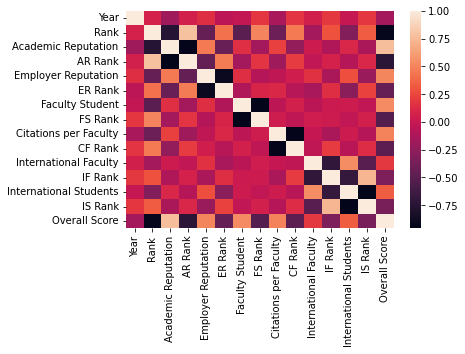

In [4]:
sns.heatmap(data=df.corr())


In [5]:
#sns.pairplot(data=df, hue='Year')


## Definiendo nuestros predictores

En este caso todas las caracteristicas seran los predictores, mientras que la variable a predecir sera _Overall Score_

In [6]:
df.columns

Index(['Year', 'Rank', 'O_Rank', 'Institution ', 'Academic Reputation',
       'AR Rank', 'Employer Reputation', 'ER Rank', 'Faculty Student',
       'FS Rank', 'Citations per Faculty', 'CF Rank', 'International Faculty',
       'IF Rank', 'International Students', 'IS Rank', 'Overall Score'],
      dtype='object')

In [7]:
columnas = ['AR Rank', 'ER Rank', 'FS Rank','CF Rank', 'IF Rank', 'IS Rank']

In [8]:
X = df[columnas].values

Y = df['Overall Score'].values


Para evitar _overfitting_ separamos los datos en 80% para entrenamiento y 20% para test

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=0)


Aplicamos el modelo de regresion lineal con los datos de entrenamiento

In [10]:
modelo = LinearRegression()


In [11]:
modelo.fit(X_train, Y_train)


LinearRegression()

Ahora usaremos un **dataframe** para visualizar los coeficientes como en Excel

In [12]:
coeff = pd.DataFrame(modelo.coef_, columnas, columns=['Coeffs'])


In [13]:
coeff


,Coeffs
AR Rank,-0.107306
ER Rank,-0.025869
FS Rank,-0.033679
CF Rank,-0.036277
IF Rank,-0.010182
IS Rank,-0.008241


La variable *Y_pred* sera la y que el modelo predecira usando los datos de test o sea el 20%

In [14]:
Y_pred = modelo.predict(X_test)


Para la validacion se calculara la diferencia entre la _y_ de prueba y la _y_ predecida

In [15]:
validacion = pd.DataFrame(
    {"Actual": Y_test, "Prediccion": Y_pred, "Diferencia": Y_test-Y_pred})


Tomamos una muestra de la validacion para hacer nuestros plot

In [16]:
validacion
muestra = validacion.sample(30)


Adicionalmente calculamos el $R^2$

In [17]:
r2_train = modelo.score(X_train, Y_train)
r2_test = modelo.score(X_test, Y_test)
print(f"R2 del entrenamiento: {r2_train:.4f}\nR2 del test: {r2_test:.4f}")


R2 del entrenamiento: 0.9222
R2 del test: 0.9158


Finalmente hacemos este plot, el cual nos muestra una buena precision del modelo

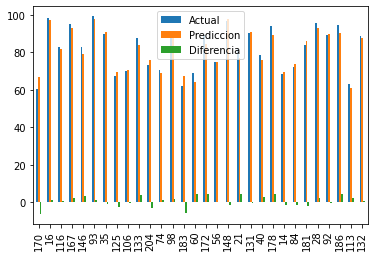

In [18]:
muestra.plot.bar()
plt.savefig('../data/img/diferencia.jpg', dpi=500)


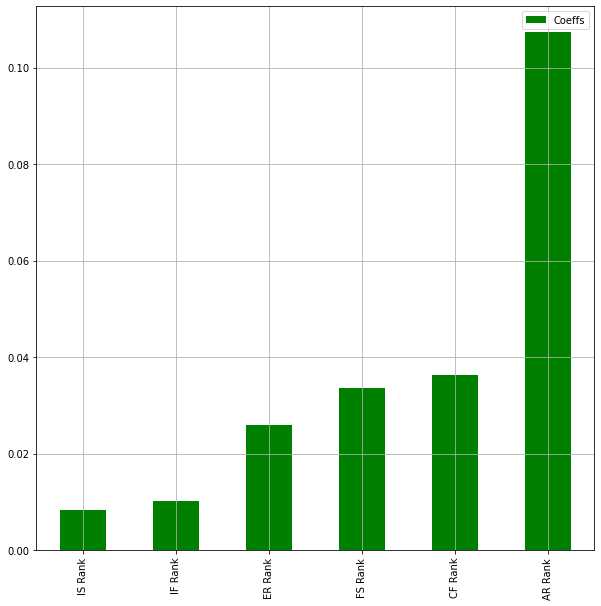

In [19]:
coeffs = abs(coeff.sort_values(by='Coeffs',ascending=False))
coeffs.plot.bar(figsize=(10,10),color='green')
plt.grid()
plt.show()